In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Clean Up
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [35]:
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])
job_titles =  df_US['job_title_short'].value_counts().index[:6].tolist()
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

C:\Users\AHMK\AppData\Local\Temp\ipykernel_22748\3215102459.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order, palette='Set3')


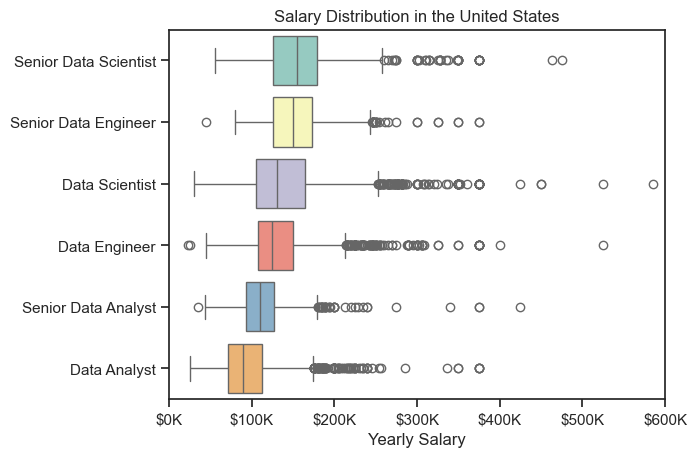

In [43]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order, palette='Set3')
sns.set_theme(style='ticks')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary')
plt.ylabel('')
plt.xlim(0,600000)
tick_x = plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(tick_x) 
plt.show()


In [37]:
df_DA_US = df_US[(df_US['job_title_short'] == 'Data Analyst')].copy()
df_DA_US = df_DA_US.explode('job_skills')
# df_DA_US[['salary_year_avg', 'job_skills']].head(6)
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median', ascending=False).head(10)
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False).head(10)
df_DA_skills = df_DA_skills.sort_values(by='median', ascending=False)

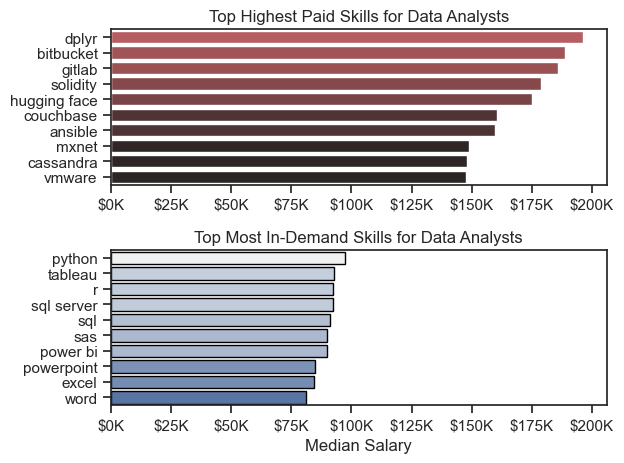

In [41]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")

# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
sns.barplot(data=df_DA_top_pay, x='median',y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:r')
ax[0].legend().remove()
ax[0].set_title('Top Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# df_DA_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
sns.barplot(data=df_DA_skills, x='median',y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b_r',edgecolor='black')
ax[1].legend().remove()
ax[1].set_title('Top Most In-Demand Skills for Data Analysts')
ax[1].invert_xaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()